In [103]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from scipy.stats import randint, uniform
import time
from sklearn.model_selection import train_test_split

In [10]:

#veritabanini oku
path = "/content/drive/MyDrive/mushrooms/mushrooms1.csv"
df =pd.read_csv(path)
df .head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
#SORU1:
# Random Forest, birden fazla karar ağacının bir araya gelerek oluşturduğu bir topluluk öğrenme algoritmasıdır.
# Her bir ağaç, veri setinin rastgele bir alt kümesi üzerinde eğitilir ve sonuçta tüm ağaçların tahminlerinin ortalaması veya çoğunluk oylaması alınır.

In [11]:
# Hedef değişken dağılımını görelim
print("\nHedef değişken (class) dağılımı:")
print(df['class'].value_counts())


Hedef değişken (class) dağılımı:
class
e    4208
p    3916
Name: count, dtype: int64


In [12]:
# Veri setini hazırlama
X = df.drop('class', axis=1)  # Bağımsız değişkenler
y = df['class']  # Hedef değişken

In [13]:
# Kategorik değişkenleri sayısala çevirme
X_encoded = pd.get_dummies(X)

In [14]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print("\nEğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (6499, 117)
Test seti boyutu: (1625, 117)


In [15]:
# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Test seti üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

In [17]:
# Model performansını değerlendirme
print("\nModel Performans Metrikleri:")
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Model Performans Metrikleri:
Doğruluk (Accuracy): 1.0

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



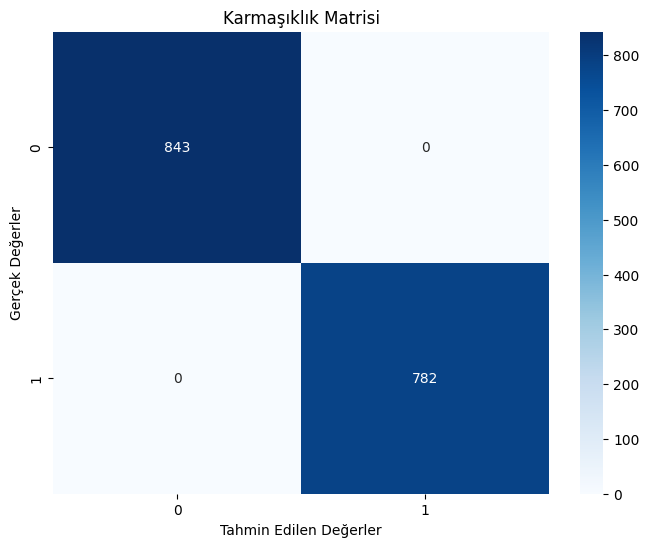

In [18]:
# Karmaşıklık matrisi (Confusion Matrix)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

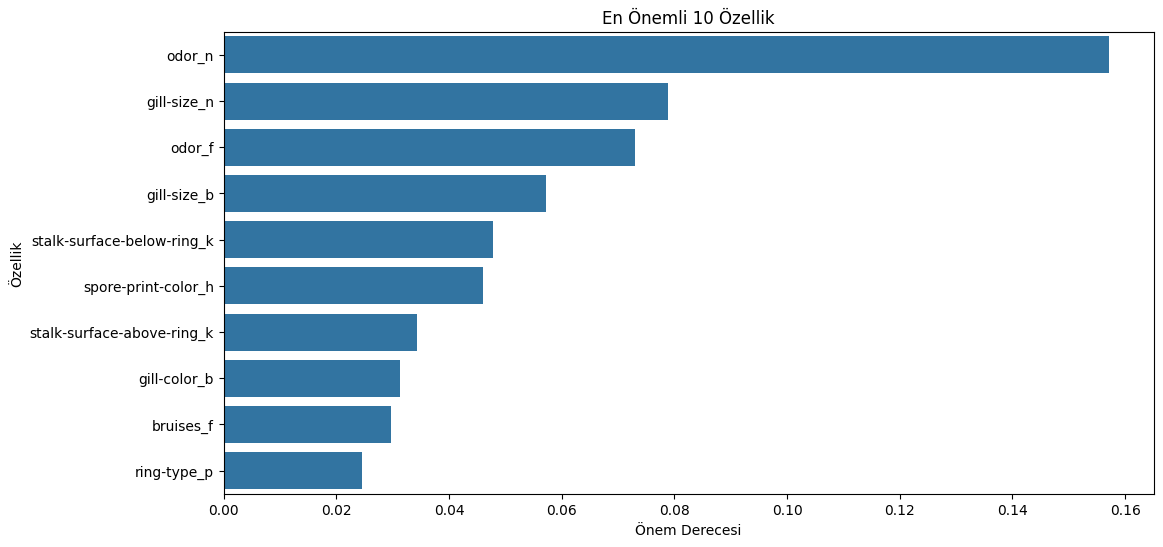

In [19]:
# Özellik önemliliklerini görselleştirme
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('En Önemli 10 Özellik')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.show()


In [20]:
# İlk 10 önemli özelliği yazdırma
print("\nEn önemli 10 özellik:")
print(feature_importance.head(10))


En önemli 10 özellik:
                       feature  importance
27                      odor_n    0.157207
36                 gill-size_n    0.078919
24                      odor_f    0.073091
35                 gill-size_b    0.057143
61  stalk-surface-below-ring_k    0.047809
96         spore-print-color_h    0.045977
57  stalk-surface-above-ring_k    0.034324
37                gill-color_b    0.031227
20                   bruises_f    0.029623
94                 ring-type_p    0.024529


In [21]:
# Örnek tahmin
print("\nÖrnek tahminler:")
sample_predictions = rf_model.predict(X_test[:5])
print("İlk 5 tahmin:", sample_predictions)
print("Gerçek değerler:", y_test[:5].values)


Örnek tahminler:
İlk 5 tahmin: ['e' 'p' 'p' 'e' 'p']
Gerçek değerler: ['e' 'p' 'p' 'e' 'p']


In [24]:
print("\n========= NAIVE BAYES MODELİ =========")
# Naive Bayes modelini oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


========= NAIVE BAYES MODELİ =========


GaussianNB()

In [25]:
# Test seti üzerinde tahmin yapma
nb_pred = nb_model.predict(X_test)

In [26]:
# Naive Bayes Model performansını değerlendirme
print("\nNaive Bayes Model Performans Metrikleri:")
print("Doğruluk (Accuracy):", accuracy_score(y_test, nb_pred))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, nb_pred))


Naive Bayes Model Performans Metrikleri:
Doğruluk (Accuracy): 0.96

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           e       1.00      0.92      0.96       843
           p       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



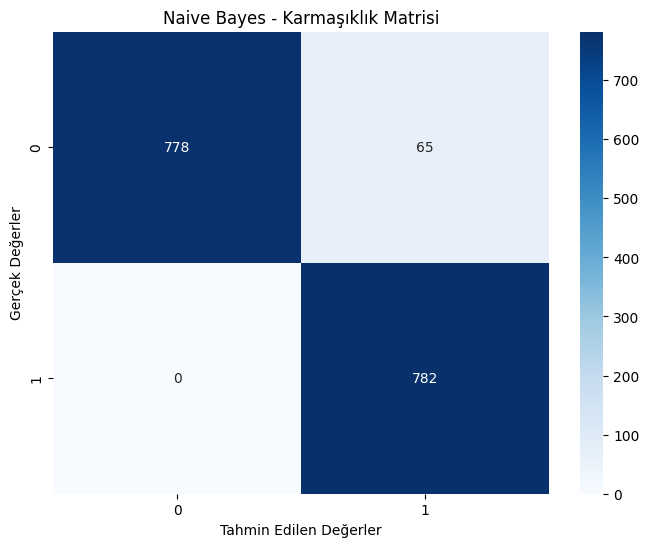

In [27]:
# Naive Bayes Karmaşıklık matrisi
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes - Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

In [28]:
# Naive Bayes örnek tahminler
print("\nNaive Bayes Örnek tahminler:")
nb_sample_predictions = nb_model.predict(X_test[:5])
print("İlk 5 tahmin:", nb_sample_predictions)
print("Gerçek değerler:", y_test[:5].values)


Naive Bayes Örnek tahminler:
İlk 5 tahmin: ['e' 'p' 'p' 'e' 'p']
Gerçek değerler: ['e' 'p' 'p' 'e' 'p']


In [29]:
print("\n========= K-NEAREST NEIGHBOR MODELİ =========")
# KNN modelini oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=5)  # 5 komşu kullanarak
knn_model.fit(X_train, y_train)


========= K-NEAREST NEIGHBOR MODELİ =========


KNeighborsClassifier()

In [30]:
# Test seti üzerinde tahmin yapma
knn_pred = knn_model.predict(X_test)

In [32]:
# KNN Model performansını değerlendirme
print("\nKNN Model Performans Metrikleri:")
print("Doğruluk (Accuracy):", accuracy_score(y_test, knn_pred))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, knn_pred))


KNN Model Performans Metrikleri:
Doğruluk (Accuracy): 1.0

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



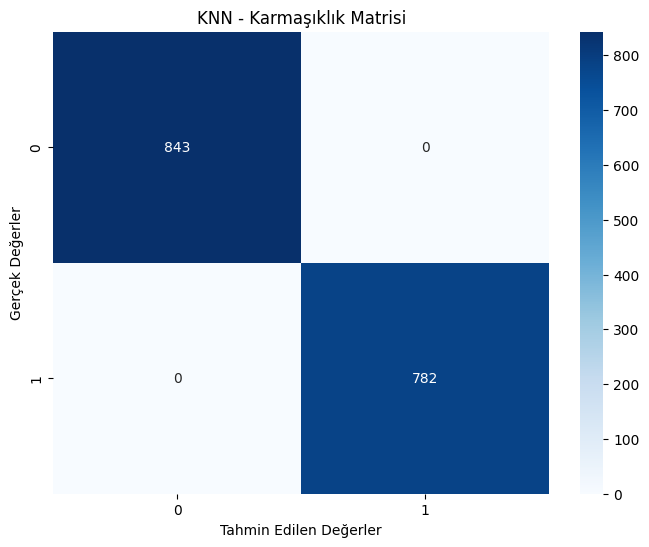

In [33]:
# KNN Karmaşıklık matrisi
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN - Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

In [34]:
# KNN örnek tahminler
print("\nKNN Örnek tahminler:")
knn_sample_predictions = knn_model.predict(X_test[:5])
print("İlk 5 tahmin:", knn_sample_predictions)
print("Gerçek değerler:", y_test[:5].values)



KNN Örnek tahminler:
İlk 5 tahmin: ['e' 'p' 'p' 'e' 'p']
Gerçek değerler: ['e' 'p' 'p' 'e' 'p']


In [35]:
# Modelleri karşılaştırma
print("\n========= MODEL KARŞILAŞTIRMASI =========")
print("Random Forest Doğruluk:", accuracy_score(y_test, y_pred))
print("Naive Bayes Doğruluk:", accuracy_score(y_test, nb_pred))
print("KNN Doğruluk:", accuracy_score(y_test, knn_pred))


========= MODEL KARŞILAŞTIRMASI =========
Random Forest Doğruluk: 1.0
Naive Bayes Doğruluk: 0.96
KNN Doğruluk: 1.0


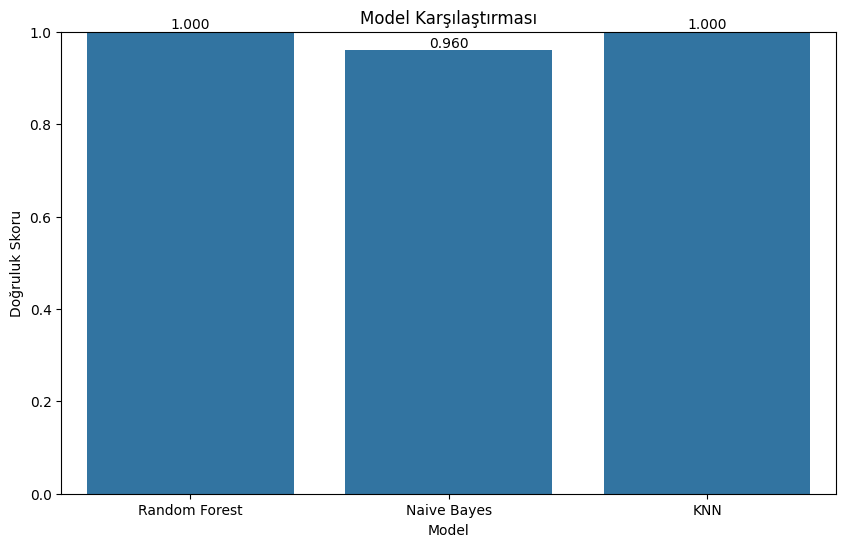

In [36]:
# Modellerin karşılaştırma grafiği
model_names = ['Random Forest', 'Naive Bayes', 'KNN']
accuracies = [accuracy_score(y_test, y_pred),
              accuracy_score(y_test, nb_pred),
              accuracy_score(y_test, knn_pred)]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Doğruluk Skoru')
plt.ylim(0, 1)  # y eksenini 0-1 arası ayarla
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.3f}', ha='center', va='bottom')
plt.show()

In [98]:
# Random Forest için hiperparametre uzayı
rf_param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None] + list(range(10, 100, 10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# KNN için hiperparametre uzayı
knn_param_dist = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(20, 100),
    'p': [1, 2]  # Manhattan ve Öklid mesafeleri
}

# Naive Bayes için hiperparametre uzayı
nb_param_dist = {
    'var_smoothing': uniform(1e-10, 1e-8)
}


In [99]:
def perform_random_search(model, param_dist, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()

    # RandomizedSearchCV nesnesini oluştur
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=20,  # Deneme sayısı
        cv=5,  # 5-katlı çapraz doğrulama
        verbose=1,
        n_jobs=-1,  # Tüm CPU çekirdeklerini kullan
        random_state=42,
        scoring='accuracy'
    )

    # Modeli eğit
    random_search.fit(X_train, y_train)

    # En iyi sonuçları yazdır
    print(f"\n{model_name} - En İyi Parametreler:")
    print(random_search.best_params_)
    print(f"\n{model_name} - En İyi Skor: {random_search.best_score_:.4f}")

    # Test seti üzerinde performans
    y_pred = random_search.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Test Seti Doğruluğu: {test_score:.4f}")

    # Çalışma süresini yazdır
    end_time = time.time()
    print(f"{model_name} - Optimizasyon Süresi: {(end_time - start_time):.2f} saniye")

    return random_search, test_score, y_pred


In [100]:
rf_random_search, rf_test_score, rf_y_pred = perform_random_search(RandomForestClassifier(), rf_param_dist, "Random Forest", X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Random Forest - En İyi Parametreler:
{'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 73}

Random Forest - En İyi Skor: 1.0000
Random Forest - Test Seti Doğruluğu: 1.0000
Random Forest - Optimizasyon Süresi: 41.02 saniye


In [92]:
knn_random_search, knn_test_score, knn_y_pred = perform_random_search(KNeighborsClassifier(), knn_param_dist, "KNN", X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

KNN - En İyi Parametreler:
{'algorithm': 'brute', 'leaf_size': 80, 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

KNN - En İyi Skor: 1.0000
KNN - Test Seti Doğruluğu: 1.0000
KNN - Optimizasyon Süresi: 82.33 saniye


In [93]:
nb_random_search, nb_test_score, nb_y_pred = perform_random_search(GaussianNB(), nb_param_dist, "Naive Bayes", X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Naive Bayes - En İyi Parametreler:
{'var_smoothing': 9.799098521619942e-09}

Naive Bayes - En İyi Skor: 0.9768
Naive Bayes - Test Seti Doğruluğu: 0.9717
Naive Bayes - Optimizasyon Süresi: 5.39 saniye


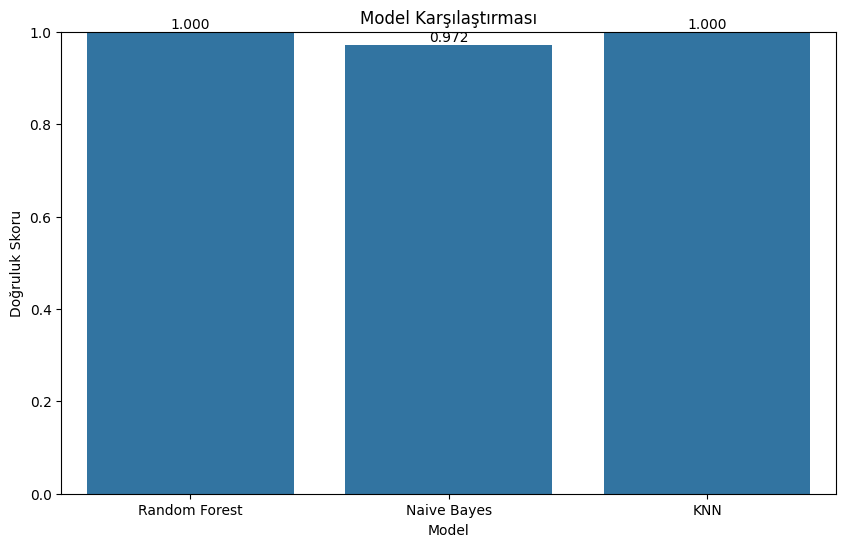

In [101]:
# Modellerin doğruluk skorlarını karşılaştıralım
model_names = ['Random Forest', 'Naive Bayes', 'KNN']
accuracies = [rf_test_score, nb_test_score, knn_test_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Doğruluk Skoru')
plt.ylim(0, 1)  # y eksenini 0-1 arası ayarla
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.3f}', ha='center', va='bottom')
plt.show()


In [104]:
# Random Forest
rf_random_search, rf_test_score, rf_y_pred = perform_random_search(RandomForestClassifier(), rf_param_dist, "Random Forest", X_train, X_test, y_train, y_test)

# KNN
knn_random_search, knn_test_score, knn_y_pred = perform_random_search(KNeighborsClassifier(), knn_param_dist, "KNN", X_train, X_test, y_train, y_test)

# Naive Bayes
nb_random_search, nb_test_score, nb_y_pred = perform_random_search(GaussianNB(), nb_param_dist, "Naive Bayes", X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Random Forest - En İyi Parametreler:
{'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 73}

Random Forest - En İyi Skor: 1.0000
Random Forest - Test Seti Doğruluğu: 1.0000
Random Forest - Optimizasyon Süresi: 55.90 saniye
Fitting 5 folds for each of 20 candidates, totalling 100 fits

KNN - En İyi Parametreler:
{'algorithm': 'brute', 'leaf_size': 80, 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

KNN - En İyi Skor: 1.0000
KNN - Test Seti Doğruluğu: 1.0000
KNN - Optimizasyon Süresi: 79.58 saniye
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Naive Bayes - En İyi Parametreler:
{'var_smoothing': 9.799098521619942e-09}

Naive Bayes - En İyi Skor: 0.9768
Naive Bayes - Test Seti Doğruluğu: 0.9717
Naive Bayes - Optimizasyon Süresi: 3.05 saniye


In [105]:
# Fonksiyonu tanımlayalım
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} - Doğruluk: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")
    print(f"{model_name} - Recall: {recall:.4f}")
    print(f"{model_name} - F1 Skoru: {f1:.4f}")
    return accuracy, precision, recall, f1

# Her model için metrikleri hesapla
rf_metrics = calculate_metrics(y_test, rf_y_pred, "Random Forest")
knn_metrics = calculate_metrics(y_test, knn_y_pred, "KNN")
nb_metrics = calculate_metrics(y_test, nb_y_pred, "Naive Bayes")


Random Forest - Doğruluk: 1.0000
Random Forest - Precision: 1.0000
Random Forest - Recall: 1.0000
Random Forest - F1 Skoru: 1.0000
KNN - Doğruluk: 1.0000
KNN - Precision: 1.0000
KNN - Recall: 1.0000
KNN - F1 Skoru: 1.0000
Naive Bayes - Doğruluk: 0.9717
Naive Bayes - Precision: 0.9733
Naive Bayes - Recall: 0.9717
Naive Bayes - F1 Skoru: 0.9717


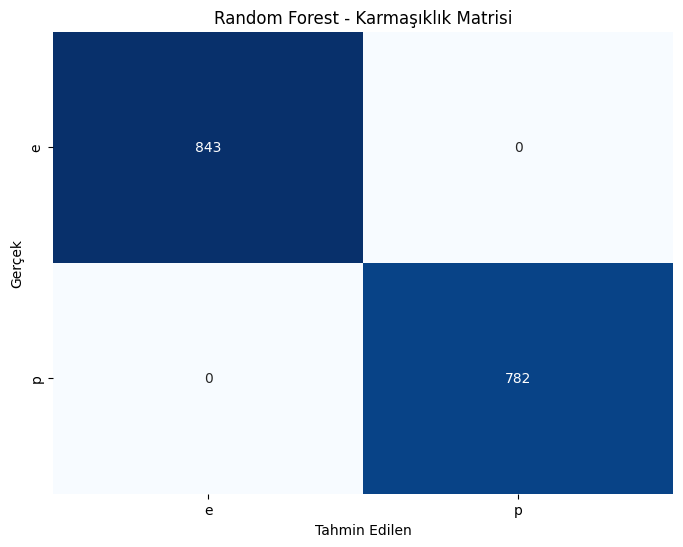

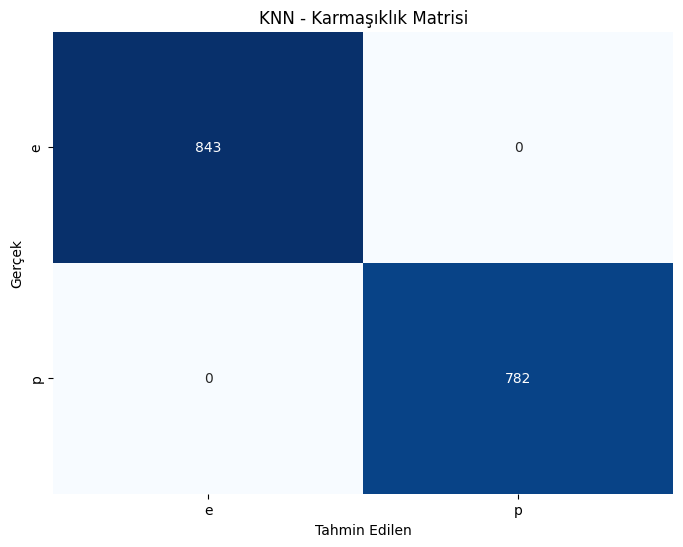

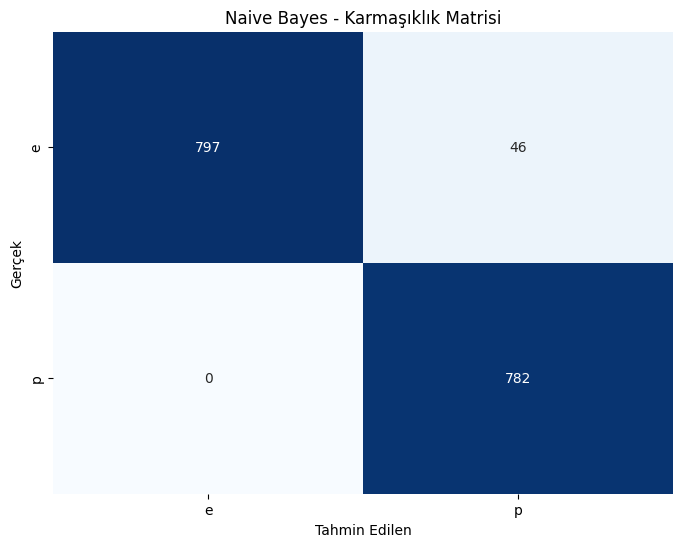

In [106]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'{model_name} - Karmaşıklık Matrisi')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

# Her model için karmaşıklık matrisini göster
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest")
plot_confusion_matrix(y_test, knn_y_pred, "KNN")
plot_confusion_matrix(y_test, nb_y_pred, "Naive Bayes")


In [ ]:
#Random Forest modelinin doğruluk oranı %100 olduğundan, bu modelin test verisi üzerinde mükemmel bir performans sergilediği anlaşılmakta.
# Ancak, bu durum aşırı öğrenmeye işaret edebilir. Bu nedenle, modelin genel geçerliliğini test etmek için daha fazla veri seti ile doğrulamak iyi bir uygulama olacaktır.